# **Q2**

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("img1.jpg", 0)

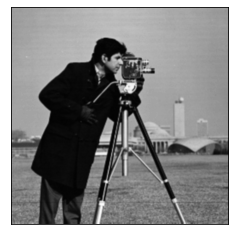

In [ ]:
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])

kernel = kernel / 9

res = cv2.filter2D(img, -1, kernel)
cv2.imwrite('blurred_3.jpg', res)

plt.xticks([])
plt.yticks([])
plt.imshow(res, cmap='gray')
plt.show()

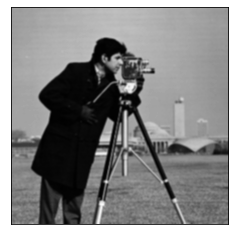

In [ ]:
kernel = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]])

kernel = kernel / 25

res = cv2.filter2D(img, -1, kernel)
cv2.imwrite('blurred_5.jpg', res)

plt.xticks([])
plt.yticks([])
plt.imshow(res, cmap='gray')
plt.show()

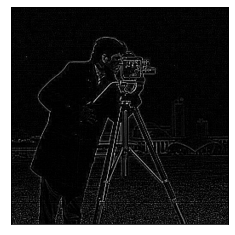

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

res = cv2.filter2D(img, -1, kernel)
cv2.imwrite('edge_detection.jpg', res)

plt.xticks([])
plt.yticks([])
plt.imshow(res, cmap='gray')
plt.show()

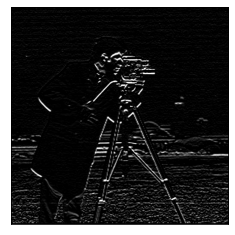

In [ ]:
kernel = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

res = cv2.filter2D(img, -1, kernel)
cv2.imwrite('horizontal_edge_detection.jpg', res)

plt.xticks([])
plt.yticks([])
plt.imshow(res, cmap='gray')
plt.show()

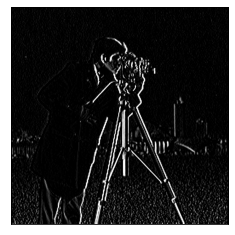

In [ ]:
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

res = cv2.filter2D(img, -1, kernel)
cv2.imwrite('vertical_edge_detection.jpg', res)

plt.xticks([])
plt.yticks([])
plt.imshow(res, cmap='gray')
plt.show()

# **Q3**

In [55]:
# !pip install -q -U keras-tuner

In [1]:
import numpy as np
import keras_tuner as kt
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

In [56]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
def build_model(hp):

    model = keras.Sequential()
    model.add(Conv2D(
        input_shape=(32, 32, 3),
        filters=hp.Int('conv_layer_1_filter_size', min_value=32, max_value=256, step=32),
        kernel_size=(5, 5),
        activation='elu'))
    
    for i in range(hp.Int('conv_layers_num', 0, 4)):
        model.add(Conv2D(
            filters=hp.Int('conv_layer_' + str(i + 2) + '_filters', min_value=32, max_value=256, step=32),
            kernel_size=(5, 5),
            activation='elu'))
        
        # model.add(MaxPooling2D(pool_size=(3, 3)))
    
    model.add(Flatten())
    for i in range(hp.Int('dense_layers_num', 0, 5)):
        model.add(Dense(
            units=hp.Int('dense_layer_' + str(i + 1) + '_units', min_value=32, max_value=256, step=32),
            activation='elu'))

    model.add(Dense(10, activation='softmax'))

    lr = hp.Float('lr', min_value=.0001, max_value=.001, sampling='log')
    
    opt_map = {'adam': Adam, 'sgd': SGD}
    optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
    optimizer = opt_map[optimizer](learning_rate=lr)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

m = build_model(kt.HyperParameters())
# m.fit(x_train, y_train, epochs=20, batch_size=256, validation_data=(x_test, y_test))

In [30]:
tuner = kt.BayesianOptimization(hypermodel=build_model, objective="val_accuracy", max_trials=3)

tuner.search_space_summary()

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
Search space summary
Default search space size: 5
conv_layer_1_filter_size (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
conv_layers_num (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 4, 'step': 1, 'sampling': None}
dense_layers_num (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 5, 'step': 1, 'sampling': None}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'log'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'sgd'], 'ordered': False}


In [31]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Trial 4 Complete [00h 04m 23s]
val_accuracy: 0.5454000234603882

Best val_accuracy So Far: 0.6351000070571899
Total elapsed time: 00h 12m 22s
INFO:tensorflow:Oracle triggered exit


In [53]:
best_hps = tuner.get_best_hyperparameters(5)
model = build_model(best_hps[0])

model.summary()
tuner.results_summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 64)        4864      
                                                                 
 conv2d_46 (Conv2D)          (None, 24, 24, 32)        51232     
                                                                 
 conv2d_47 (Conv2D)          (None, 20, 20, 32)        25632     
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 32)        25632     
                                                                 
 flatten_12 (Flatten)        (None, 8192)              0         
                                                                 
 dense_69 (Dense)            (None, 32)                262176    
                                                                 
 dense_70 (Dense)            (None, 32)              

In [54]:
model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 13s 29ms/step - loss: 1.8889 - accuracy: 0.2919 - val_loss: 1.6677 - val_accuracy: 0.3783
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 1.5276 - accuracy: 0.4382 - val_loss: 1.4419 - val_accuracy: 0.4630
Epoch 3/10
391/391 [==============================] - 11s 28ms/step - loss: 1.3214 - accuracy: 0.5230 - val_loss: 1.2876 - val_accuracy: 0.5415
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 1.1787 - accuracy: 0.5796 - val_loss: 1.1945 - val_accuracy: 0.5723
Epoch 5/10
391/391 [==============================] - 11s 28ms/step - loss: 1.0725 - accuracy: 0.6213 - val_loss: 1.1534 - val_accuracy: 0.5928
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.9744 - accuracy: 0.6562 - val_loss: 1.0824 - val_accuracy: 0.6232
Epoch 7/10
391/391 [==============================] - 11s 28ms/step - loss: 0.8845 - accuracy: 0.6878 - val_loss: 1.1364 - val_accuracy: